<a href="https://colab.research.google.com/github/ali-workshop/Estimate-The-Cluster-Color-Density-For-RGB-Color-Image-By-Kernel-Density-Estimator-KDE-with-ML/blob/main/Estimate_The_Cluster_Color_Density_For_RGB_Color_Image_By_Kernel_Density_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Kernel Density Estimation?
Kernel density estimation is a nonparametric model used for estimating probability distributions. Before diving too deeply into kernel density estimation, it is helpful to understand the concept of nonparametric estimation.

Nonparametric Estimation
Unlike traditional estimation techniques, nonparametric estimation does not assume that data is drawn from a known distribution. Rather, nonparametric models determine the model structure from the underlying data.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import cv2 as cv
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from skimage.io import imread

colors = ["r", "b", "g", "c", "m", "y"]

#create a kernel density estimation (KDE) plot on a group of images to better understand the information using seaborn

In [ ]:
def getKDE(images):
    ''' get the kernel density estimate (in plot) of a list of images '''
    sns.set(style="darkgrid")
    for index, image in enumerate(images):
        fig = sns.kdeplot(data = image.ravel(), legend=True, color=colors[index-1])
    plt.show()

In [ ]:
image_path1="/content/download (18).jpeg"
image_path2="/content/download (19).jpeg"

In [ ]:
img1=cv.imread(image_path1)
img2=cv.imread(image_path2)

In [ ]:
images=[img1,img2]

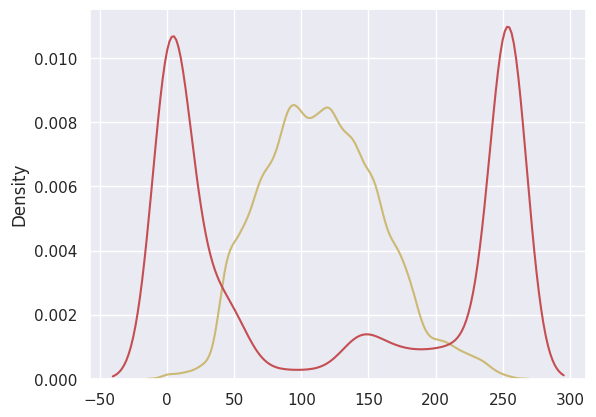

In [ ]:
getKDE(images)

#visualize the three chanels of an image

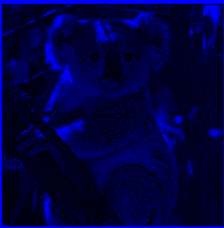

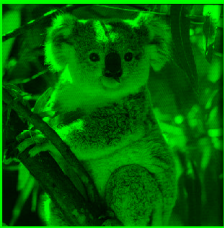

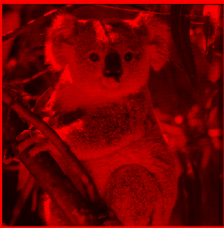

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/coala.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Split the image into its RGB channels
    b, g, r = cv2.split(image)

    # Create blank images for each channel
    blue_channel = np.zeros_like(b)
    green_channel = np.zeros_like(g)
    red_channel = np.zeros_like(r)

    # Merge each channel into an RGB image with a single channel
    blue_image = cv2.merge([blue_channel, green_channel, red_channel])
    green_image = cv2.merge([blue_channel, green_channel, red_channel])
    red_image = cv2.merge([blue_channel, green_channel, red_channel])

    # Set the individual channel values
    blue_image[:, :, 0] = b
    green_image[:, :, 1] = g
    red_image[:, :, 2] = r

    # Display the segmented images
    cv2_imshow( blue_image)
    cv2_imshow( green_image)
    cv2_imshow( red_image)

    # Wait for a key press and then close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#plot the orginal images VS the segmented images

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


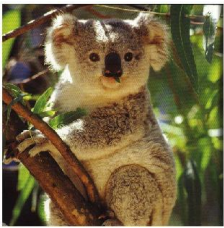

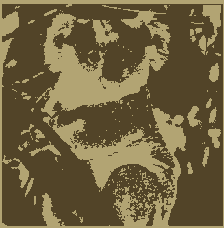

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

# Load your image
image = cv2.imread('/content/coala.png')

# Reshape the image to a 2D array of RGB values
rgb_values = image.reshape(-1, 3)

# Number of clusters (you can adjust this)
n_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rgb_values)

# Get the labels assigned to each pixel
labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.astype(int)

# Reshape the labels to match the original image size
labels = labels.reshape(image.shape[:2])
segmented_image = np.zeros_like(image)

# Assign each pixel in the segmented image to its corresponding cluster center color
for cluster_label in range(n_clusters):
    segmented_image[labels == cluster_label] = cluster_centers[cluster_label]

# Display the original image and the segmented image
cv2_imshow(image)
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


#now start with calc the density for each cluster

In [ ]:
# Load the RGB image
image = imread('/content/coala.png')

# Flatten the image to create an array of RGB values
rgb_values = image.reshape(-1, 3).astype(float)


In [ ]:
rgb_values.shape

(29904, 3)

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
n_clusters = 5  # You can adjust this based on your image and desired clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rgb_values)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels = kmeans.predict(rgb_values)


In [ ]:
kde_estimators = []

for cluster in range(n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = rgb_values[cluster_labels == cluster]

    kde = KernelDensity(bandwidth=5.0, kernel='gaussian')
    kde.fit(cluster_data)

    kde_estimators.append(kde)


In [ ]:
# Define a grid size
x, y, z = np.meshgrid(np.linspace(0, 255, 64), np.linspace(0, 255, 64), np.linspace(0, 255, 64))
grid_points = np.column_stack([x.ravel(), y.ravel(), z.ravel()])


In [ ]:
cluster_densities = []

for kde in kde_estimators:
    cluster_density = np.exp(kde.score_samples(grid_points))
    cluster_densities.append(cluster_density.reshape(64, 64, 64))


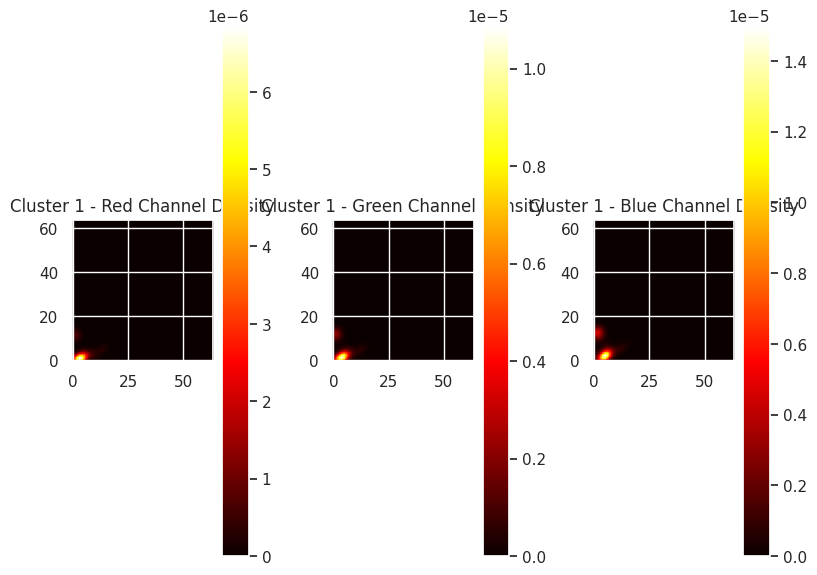

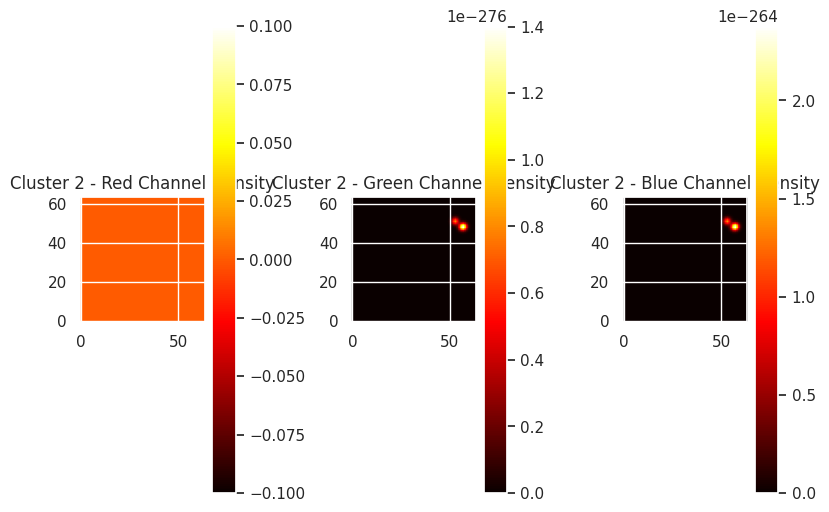

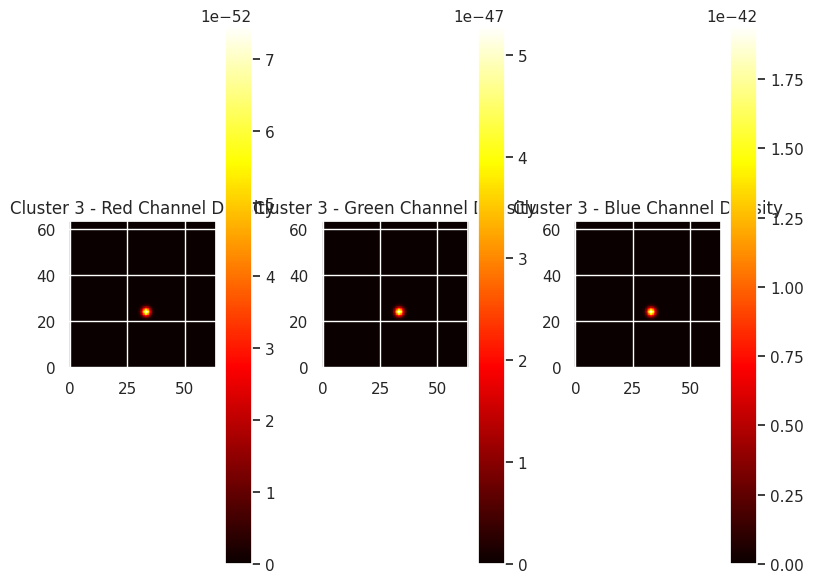

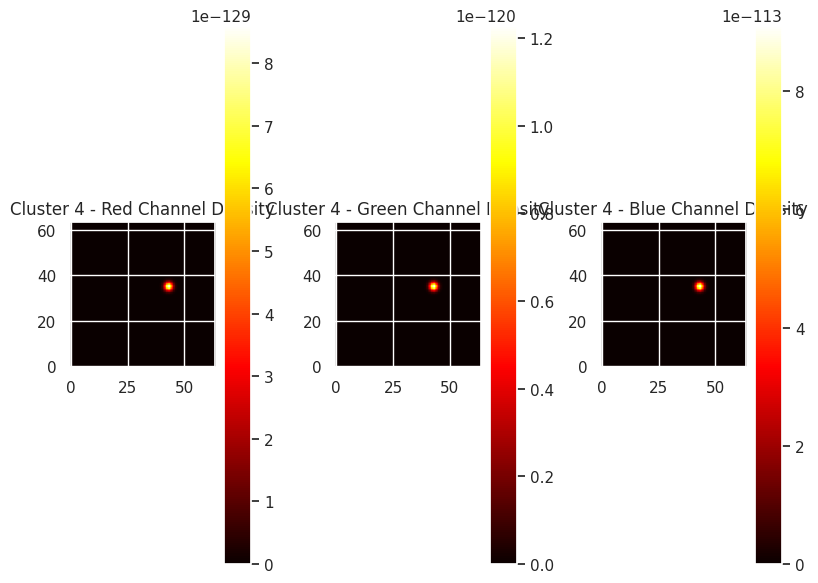

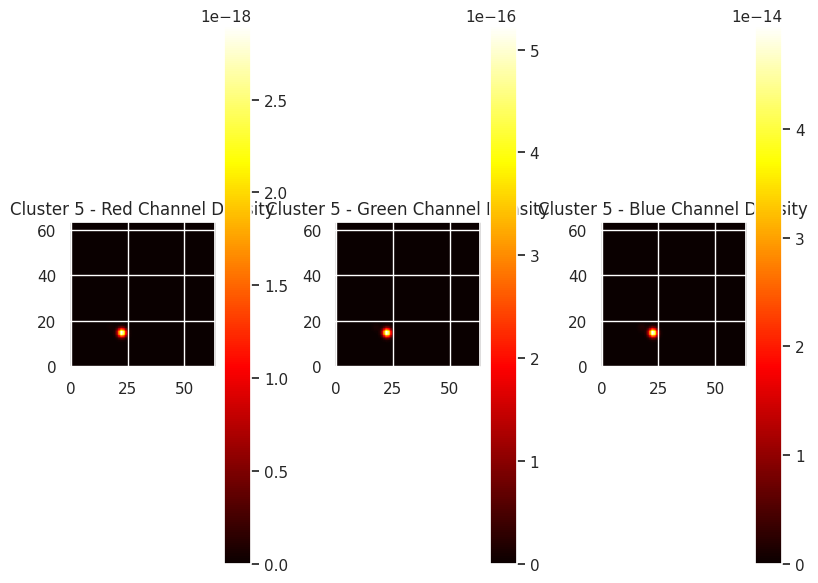

In [ ]:
for cluster, density in enumerate(cluster_densities):
    plt.figure(figsize=(8, 6))

    # Plot the red channel density
    plt.subplot(131)
    plt.imshow(density[:, :, 0], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Red Channel Density')
    plt.colorbar()

    # Plot the green channel density
    plt.subplot(132)
    plt.imshow(density[:, :, 1], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Green Channel Density')
    plt.colorbar()

    # Plot the blue channel density
    plt.subplot(133)
    plt.imshow(density[:, :, 2], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Blue Channel Density')
    plt.colorbar()

    plt.tight_layout()
    plt.show()


#collect and read the Data

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
#6463b4d76523a3d511aadcdd9df378ec

In [ ]:
od.download("https://www.kaggle.com/datasets/prasunroy/natural-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········


100%|██████████| 342M/342M [00:16<00:00, 21.8MB/s]


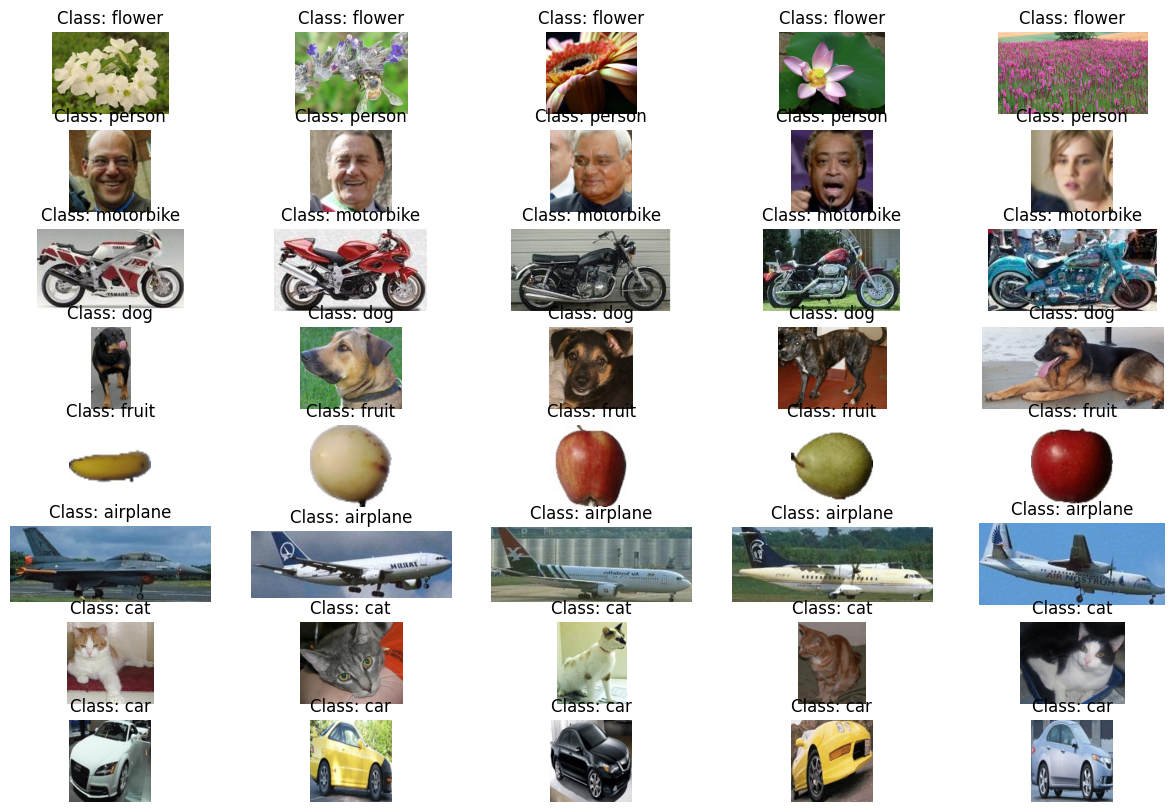

In [ ]:
import os
import os
from PIL import Image
import matplotlib.pyplot as plt

data_folder = "/content/natural-images/data/natural_images"

class_folders = [folder for folder in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, folder))]

# Set the number of rows and columns for the grid
num_rows = len(class_folders)
num_columns = 5  # Number of images to display per class

# Create a new figure for the grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_folder, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.lower().endswith((".png", ".jpg", ".jpeg", ".gif"))]

    for j in range(min(num_columns, len(image_files))):
        image_path = os.path.join(class_path, image_files[j])
        img = Image.open(image_path)

        # Place the image in the corresponding subplot
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"Class: {class_folder}")
        axes[i, j].axis("off")

# Hide any remaining empty subplots
for i in range(len(class_folders)):
    for j in range(len(image_files), num_columns):
        fig.delaxes(axes[i, j])

plt.show()


In [ ]:
class_folders

['flower', 'person', 'motorbike', 'dog', 'fruit', 'airplane', 'cat', 'car']

#define function for read_random_image_from_category

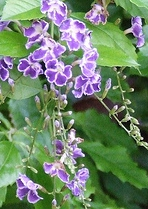

In [ ]:
import os
import cv2
import random
from google.colab.patches import cv2_imshow
def read_random_image_from_category(data_folder, category):
    category_path = os.path.join(data_folder, category)

    # List image files within the category folder
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith((".png", ".jpg", ".jpeg", ".gif"))]

    if not image_files:
        return None  # No image files found in the category

    # Choose a random image from the category
    random_image_filename = random.choice(image_files)
    image_path = os.path.join(category_path, random_image_filename)

    # Read the image using OpenCV
    img = cv2.imread(image_path)
    return img

# Usage:
data_folder ="/content/natural-images/data/natural_images"
category_name = "flower"
image = read_random_image_from_category(data_folder, category_name)

if image is not None:
    # Display the image using OpenCV
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#print the shape of an image

In [ ]:
image.shape

(209, 148, 3)

#preprocessing phase

## Apply noise removal techniques,Gaussian blurring and median filtering, to reduce noise.


In [ ]:
# Gaussian blurring
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
# Median filtering
median_filtered_image = cv2.medianBlur(image, 5)


##Artifact Correction (Image Denoising)




In [ ]:
 denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)


##Convert the image to an alternative color space,  Lab (CIELab) and HSV.

In [ ]:
# Convert to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


##Apply normalization to standardize color values across the dataset







In [ ]:
# Normalize the image using OpenCV
normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)


#define custom function for apply all prepocessing steps in single function.

In [ ]:
import cv2

def preprocess_image(image):

    # Noise Removal (Gaussian Blurring)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    # Median filtering
    median_filtered_image = cv2.medianBlur(blurred_image, 5)
    # Artifact Correction (Image Denoising)
    denoised_image = cv2.fastNlMeansDenoisingColored(median_filtered_image, None, 10, 10, 7, 21)

    # Color Space Conversion
    lab_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2Lab)
    hsv_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2HSV)
    # Grayscale Conversion
    gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
    return denoised_image, lab_image, hsv_image,gray_image





In [ ]:
denoised, lab, hsv,gray_image = preprocess_image(image)

#instialize the KDE model

In [ ]:
from sklearn.neighbors import KernelDensity

#extract the RGB values

In [ ]:
# Flatten the image to create an array of RGB values
rgb_values = gray_image.reshape(-1, 3).astype(float)


In [ ]:
gray_image.shape

(228, 224)

#defing the K-means algorithm for segment the image into groups of points

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
n_clusters = 5  # You can adjust this based on your image and desired clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rgb_values)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels = kmeans.predict(rgb_values)


#fitting the KDE on Data

In [ ]:
kde_estimators = []

for cluster in range(n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = rgb_values[cluster_labels == cluster]

    kde = KernelDensity(bandwidth=5.0, kernel='gaussian')
    kde.fit(cluster_data)

    kde_estimators.append(kde)


In [ ]:

# Define a grid size
x, y, z = np.meshgrid(np.linspace(0, 255, 64), np.linspace(0, 255, 64), np.linspace(0, 255, 64))
grid_points = np.column_stack([x.ravel(), y.ravel(), z.ravel()])


In [ ]:

cluster_densities = []

for kde in kde_estimators:
    cluster_density = np.exp(kde.score_samples(grid_points))
    cluster_densities.append(cluster_density.reshape(64, 64, 64))


#visulize the density for each cluster.

In [ ]:
import matplotlib.pyplot as plt

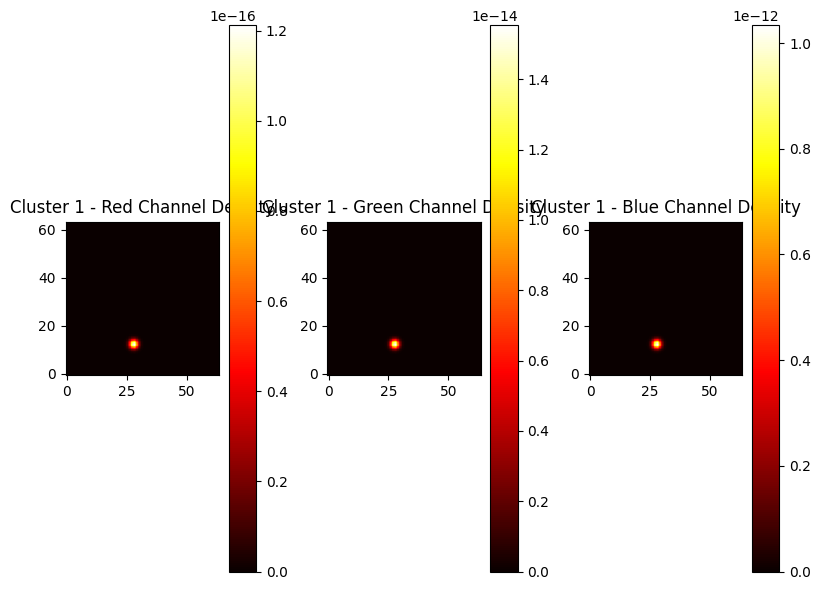

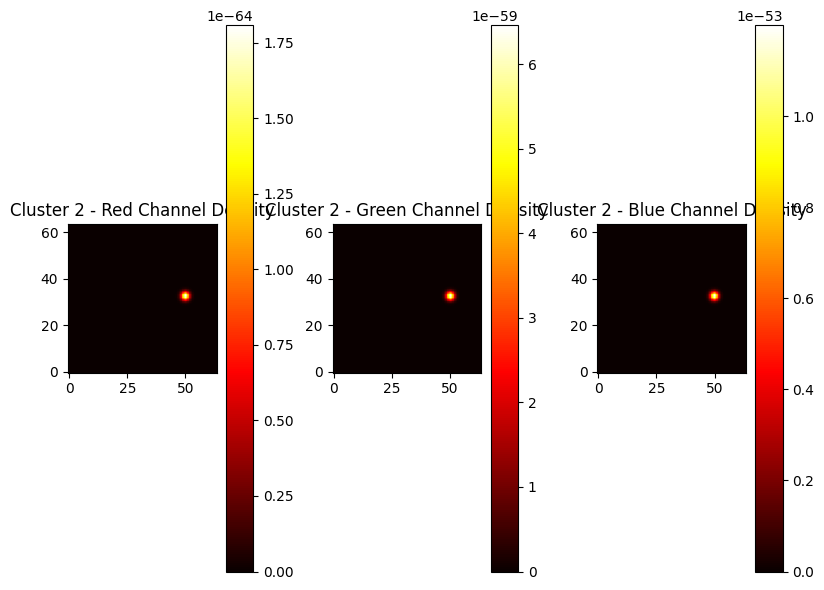

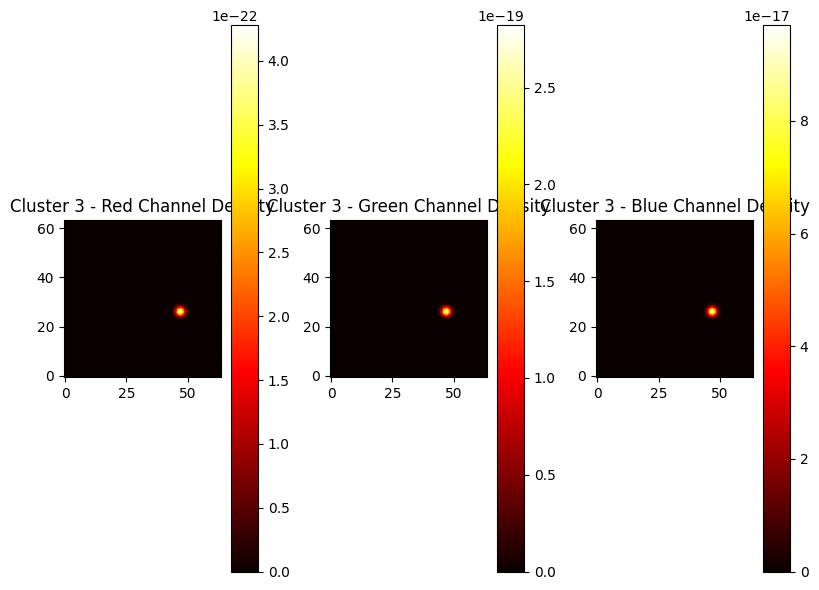

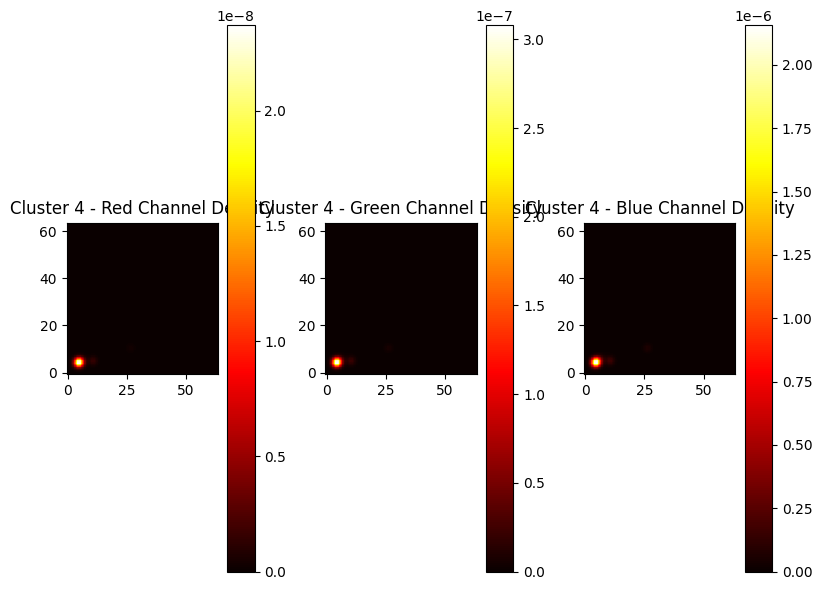

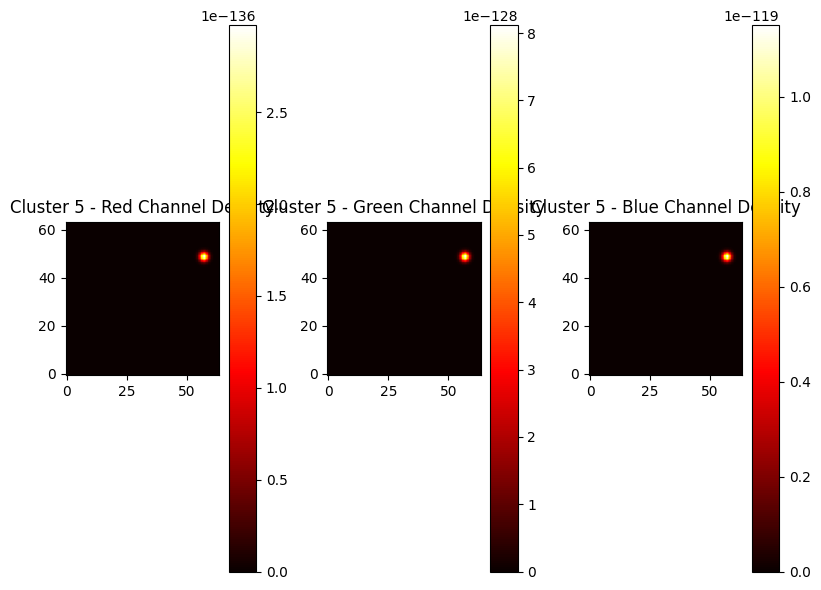

In [ ]:

for cluster, density in enumerate(cluster_densities):
    plt.figure(figsize=(8, 6))

    # Plot the red channel density
    plt.subplot(131)
    plt.imshow(density[:, :, 0], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Red Channel Density')
    plt.colorbar()

    # Plot the green channel density
    plt.subplot(132)
    plt.imshow(density[:, :, 1], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Green Channel Density')
    plt.colorbar()

    # Plot the blue channel density
    plt.subplot(133)
    plt.imshow(density[:, :, 2], origin='lower', cmap='hot')
    plt.title(f'Cluster {cluster + 1} - Blue Channel Density')
    plt.colorbar()

    plt.tight_layout()
    plt.show()


#metrics_eval

#MSE for eval the KDE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean Squared Error (MSE): 0.013972866355250437


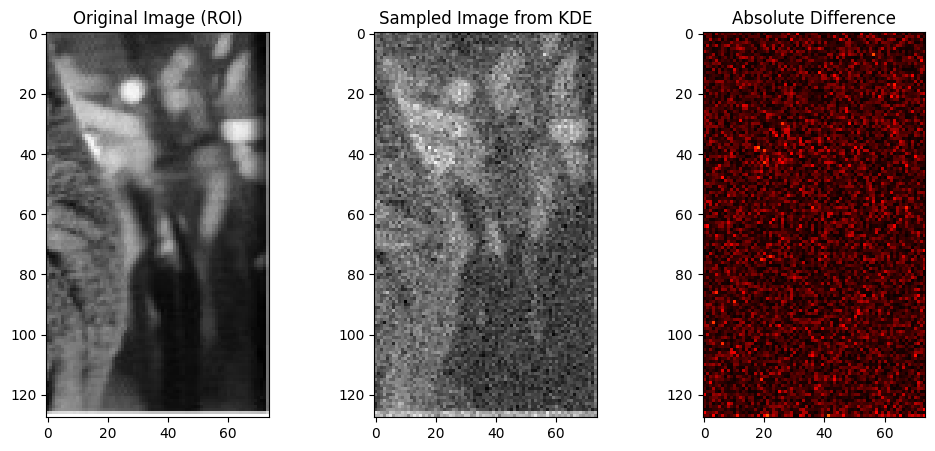

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from skimage import io, color
from sklearn.metrics import mean_squared_error

# Load the image
image_path = '/content/coala.png'  # Replace with your image path
image = io.imread(image_path)

# Check if the image has an alpha channel (4 channels)
if image.shape[-1] == 4:
    # Convert RGBA image to RGB and then to grayscale
    image = color.rgb2gray(color.rgba2rgb(image))

# Define a region of interest
roi = image[100:300, 150:350]  # Adjust the indices as needed

# Flatten the ROI into a 1D array
image_flat = roi.flatten()

# Perform k-means clustering
n_clusters = 5  # Adjust the number of clusters based on your preference
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_flat[:, np.newaxis])
cluster_labels = kmeans.predict(image_flat[:, np.newaxis])

# Create a KernelDensity estimator for each cluster
kde_estimators = []
for cluster in range(n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = image_flat[cluster_labels == cluster]

    # Create a KDE estimator for the current cluster
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(cluster_data[:, np.newaxis])

    kde_estimators.append(kde)

# Sample from the KDE estimates
sampled_data = np.zeros_like(image_flat)
for cluster, kde in zip(range(n_clusters), kde_estimators):
    # Select indices of data points belonging to the current cluster
    cluster_indices = (cluster_labels == cluster)

    # Sample from the KDE estimate for the current cluster
    sampled_data[cluster_indices] = kde.sample(sum(cluster_indices))[:, 0]

# Reshape the sampled data to the shape of the original ROI
sampled_image = np.reshape(sampled_data, roi.shape)

# Compute the Mean Squared Error (MSE) between the original image and the KDE estimate
mse = mean_squared_error(image_flat, sampled_data)

print(f"Mean Squared Error (MSE): {mse}")

# You can also display the original and sampled images for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(roi, cmap='gray')
plt.title('Original Image (ROI)')

plt.subplot(1, 3, 2)
plt.imshow(sampled_image, cmap='gray')
plt.title('Sampled Image from KDE')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(roi - sampled_image), cmap='hot', vmax=1, vmin=0)
plt.title('Absolute Difference')

plt.show()


#Evaluate KDE with a different choice of KERNEL

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
from skimage import io, color
from sklearn.metrics import mean_squared_error

# Load the image
image_path = 'coala.png'  # Replace with your image path
image = io.imread(image_path)

# Check if the image has an alpha channel (4 channels)
if image.shape[-1] == 4:
    # Convert RGBA image to RGB and then to grayscale
    image = color.rgb2gray(color.rgba2rgb(image))

# Flatten the image into a 1D array
image_flat = image.flatten()

# Define a list of different kernel choices(‘gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine’)
kernels = ["gaussian", "tophat"]

# Iterate through different kernels and evaluate KDE
for kernel in kernels:
    # Create a KernelDensity estimator with the current kernel choice
    kde = KernelDensity(bandwidth=0.1, kernel=kernel)
    kde.fit(image_flat[:, np.newaxis])

    # Sample from the KDE estimate
    sampled_data = kde.sample(len(image_flat))[:, 0]

    # Compute the Mean Squared Error (MSE) between the original image and the KDE estimate
    mse = mean_squared_error(image_flat, sampled_data)

    print(f"Kernel: {kernel}, Mean Squared Error (MSE): {mse:.2f}")



Kernel: gaussian, Mean Squared Error (MSE): 0.10
Kernel: tophat, Mean Squared Error (MSE): 0.09


#defing the DBSCAN algorithm for segment the image into groups of points and make comparsion with K-means.

In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_DBSCAN = dbscan.fit_predict(rgb_values)

In [ ]:
kde_estimators = []

for cluster in range(n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = rgb_values[cluster_labels_DBSCAN == cluster]

    kde = KernelDensity(bandwidth=5.0, kernel='gaussian')
    kde.fit(cluster_data)

    kde_estimators.append(kde)

In [ ]:

# Define a grid size
x, y, z = np.meshgrid(np.linspace(0, 255, 64), np.linspace(0, 255, 64), np.linspace(0, 255, 64))
grid_points = np.column_stack([x.ravel(), y.ravel(), z.ravel()])

cluster_densities = []

for kde in kde_estimators:
    cluster_density = np.exp(kde.score_samples(grid_points))
    cluster_densities.append(cluster_density.reshape(64, 64, 64))


#print the results for the KDE after using the DBSCAN and compare with K-means

Mean Squared Error (MSE): 0.07633552781306943


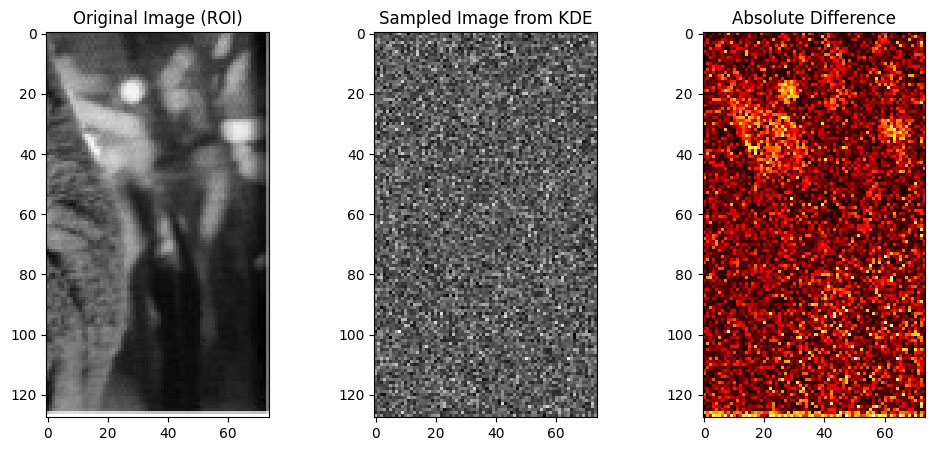

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
from skimage import io, color
from sklearn.metrics import mean_squared_error

# Load the image
image_path = '/content/coala.png'  # Replace with your image path
image = io.imread(image_path)

# Check if the image has an alpha channel (4 channels)
if image.shape[-1] == 4:
    # Convert RGBA image to RGB and then to grayscale
    image = color.rgb2gray(color.rgba2rgb(image))

# Define a region of interest
roi = image[100:300, 150:350]  # Adjust the indices as needed

# Flatten the ROI into a 1D array
image_flat = roi.flatten()

n_clusters = 5

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_DBSCAN = dbscan.fit_predict(image_flat[:, np.newaxis])

# Create a KernelDensity estimator for each cluster
kde_estimators = []
for cluster in range(n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = image_flat[cluster_labels_DBSCAN == cluster]

    # Check if the cluster_data is not empty before fitting the KDE estimator
    if len(cluster_data) > 0:
        # Create a KDE estimator for the current cluster
        kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
        kde.fit(cluster_data[:, np.newaxis])
        kde_estimators.append(kde)

# Sample from the KDE estimates
sampled_data = np.zeros_like(image_flat)
for cluster, kde in zip(range(len(kde_estimators)), kde_estimators):
    # Select indices of data points belonging to the current cluster
    cluster_indices = (cluster_labels_DBSCAN == cluster)

    # Sample from the KDE estimate for the current cluster
    sampled_data[cluster_indices] = kde.sample(sum(cluster_indices))[:, 0]

# Reshape the sampled data back to the original image shape
sampled_image = np.reshape(sampled_data, roi.shape)

# Compute the Mean Squared Error (MSE) between the original image and the KDE estimate
mse = mean_squared_error(image_flat, sampled_data)

print(f"Mean Squared Error (MSE): {mse}")

# You can also display the original and sampled images for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(roi, cmap='gray')
plt.title('Original Image (ROI)')

plt.subplot(1, 3, 2)
plt.imshow(sampled_image, cmap='gray')
plt.title('Sampled Image from KDE')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(roi - sampled_image), cmap='hot', vmax=1, vmin=0)
plt.title('Absolute Difference')

plt.show()


#as we see the K-means more effective in our appraoch